<a href="https://colab.research.google.com/github/richy1996/Springboard_Capstone_II/blob/main/modeling_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd, numpy as np
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [2]:
from google.colab import drive
drive.mount('/gdrive')
# %cd /gdrive

Mounted at /gdrive


## Read in data

In [3]:
path = '/gdrive/MyDrive/Springboard/7 Data Wrangling/Capstone 2/train.csv'
df = pd.read_csv(path)

In [4]:
# Id is index, drop this

df = df.drop(columns='Id')

In [5]:
# extract target

y = df['SalePrice'].copy()

In [6]:
# Create skeleton for hyperparamter dictionary

hyperdf = pd.DataFrame()

In [95]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate, train_test_split
import numpy.random as npr

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# set seed for reproducibility and so we can access the indices

npr.seed(seed=0)

# Define regression function

In [10]:
# define function which outputs all info we need when testing new hyperparameters

def regress(X, y, Notes='', k=5, model=LinearRegression()):
  '''
  Fits a model on the features "X" and targets "y"
  default is a LinearRegression model

  uses cross validation

  k: number of folds for cross validation
    default is 5

  X and y are pandas DataFrames

  returns a dictionary with relevant hyperparameters and metrics
  '''

  scores = cross_validate(model, X.copy(), y.copy(), cv=k,
    scoring=('neg_root_mean_squared_error', 'neg_mean_absolute_error'),
    return_train_score=True)

  # create hyperparameter dictionary
  hypers = {'Features':X.columns, '# of features':len(X.columns), \
            'Mean Train MAE':-1*np.mean(scores['train_neg_mean_absolute_error']), \
            'Std Train MAE':np.std(scores['train_neg_mean_absolute_error']), \

            'Mean Test MAE':-1*np.mean(scores['test_neg_mean_absolute_error']), \
            'Std Test MAE':np.std(scores['test_neg_mean_absolute_error']), \

            'Mean Train RMSE':-1*np.mean(scores['train_neg_root_mean_squared_error']), \
            'Std Train RMSE':np.std(scores['train_neg_root_mean_squared_error']), \

            'Mean Test RMSE':-1*np.mean(scores['test_neg_root_mean_squared_error']), \
            'Std Test RMSE':np.std(scores['test_neg_root_mean_squared_error']), \

            "Notes":Notes,
            "Folds":k,

            'Train MAE': -1*scores['train_neg_mean_absolute_error'], \
            'Test MAE': -1*scores['test_neg_mean_absolute_error'], \
            'Train RMSE': -1*scores['train_neg_root_mean_squared_error'], \
            'Test RMSE': -1*scores['test_neg_root_mean_squared_error'], \
            'Model Type':model}

  return hypers

## Numerical Features with Naive handling of NA

- I will extract the numerical/continuous features
  - Analyze the results using the naive approach, i.e. dropping the Garage year built and only filling the NA with 0
  - The smart approach doesn't drop the garage year built but puts 0 for NA and also creates a flag column for each that indicates whether or not NA was present.

In [258]:
# Numerical features where NAs are present

na_cont = ['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

In [259]:
# add a column which is a flag for those continuous features
# that have NA values

for i in na_cont:
  df[i+"_isna"] = df[i].isna()*1

In [260]:
# fill the NA with appropriate values w/in those features now
# we decided that 0 is probably best

df.loc[:, na_cont] = df[na_cont].fillna(0)

In [261]:
# do cross validation on numerical with simple approach
feats = ['MasVnrArea', 'LotFrontage']
X = df[feats].copy()

In [262]:
out = regress(X, y, Notes='Numerical features with naive approach')
out

{'Features': Index(['MasVnrArea', 'LotFrontage'], dtype='object'),
 '# of features': 2,
 'Mean Train MAE': 50917.747951370504,
 'Std Train MAE': 718.7670027488771,
 'Mean Test MAE': 51025.58272739347,
 'Std Test MAE': 2417.6208827950677,
 'Mean Train RMSE': 68771.92856289665,
 'Std Train RMSE': 1143.6560299731857,
 'Mean Test RMSE': 68911.34757402368,
 'Std Test RMSE': 4685.402441436475,
 'Notes': 'Numerical features with naive approach',
 'Folds': 5,
 'Train MAE': array([51374.92005286, 49833.77750448, 50630.65216586, 51965.9253145 ,
        50783.46471915]),
 'Test MAE': array([49139.05525895, 54376.19177995, 52518.11407142, 47567.31957995,
        51527.23294668]),
 'Train RMSE': array([69990.74915738, 67730.88469327, 68081.90550595, 70324.80143936,
        67731.30201852]),
 'Test RMSE': array([64014.98287924, 73129.5117134 , 71959.40121199, 62439.6946608 ,
        73013.1474047 ]),
 'Model Type': LinearRegression()}

In [263]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

## Numerical with smart handling of NA

- I.e. don't drop any rows/columns, fill NA with appropriate values (0) and create flag column indicating if NA is present

In [264]:
# do cross validation on numerical with smart approach
feats = [i+'_isna' for i in na_cont] + na_cont
X = df[feats].copy()

In [265]:
out = regress(X, y, Notes='Numerical features with smart approach')
out

{'Features': Index(['GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 6,
 'Mean Train MAE': 49057.00113219459,
 'Std Train MAE': 676.177734994533,
 'Mean Test MAE': 49199.270426020805,
 'Std Test MAE': 2276.4152409833405,
 'Mean Train RMSE': 66918.9730541484,
 'Std Train RMSE': 1093.1156112009694,
 'Mean Test RMSE': 67107.57500024835,
 'Std Test RMSE': 4465.232079937296,
 'Notes': 'Numerical features with smart approach',
 'Folds': 5,
 'Train MAE': array([49654.53393376, 48228.37369555, 48546.16158252, 50022.1998949 ,
        48833.73655424]),
 'Test MAE': array([46659.16858087, 51516.66593675, 51542.5738778 , 46357.34967454,
        49920.59406015]),
 'Train RMSE': array([68213.48790793, 66126.44876166, 66037.091233  , 68296.51520758,
        65921.32216057]),
 'Test RMSE': array([61862.49543686, 70396.79231829, 70847.28899983, 61431.03037616,
        71000.26787011]),
 'Model Type'

In [266]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**
- So clearly the smart handling of NA is better

## Single most correlated feature

In [267]:
feats = ['OverallQual']
X = df[feats].copy()

In [268]:
out = regress(X, y, Notes='baseline using single most correlated feature')
out

{'Features': Index(['OverallQual'], dtype='object'),
 '# of features': 1,
 'Mean Train MAE': 33723.23015893879,
 'Std Train MAE': 621.7890215270475,
 'Mean Test MAE': 33766.38485172985,
 'Std Test MAE': 2016.830372104499,
 'Mean Train RMSE': 48565.462618723344,
 'Std Train RMSE': 1107.8151274291026,
 'Mean Test RMSE': 48492.875761167765,
 'Std Test RMSE': 4389.638768623911,
 'Notes': 'baseline using single most correlated feature',
 'Folds': 5,
 'Train MAE': array([34117.10336131, 33290.29729853, 32920.44699954, 34688.08654063,
        33600.21659468]),
 'Test MAE': array([32087.02626683, 35617.89568103, 36148.95190307, 30884.38115495,
        34093.66925277]),
 'Train RMSE': array([49840.22992042, 48617.94154897, 46851.47973781, 49623.6910872 ,
        47893.97079922]),
 'Test RMSE': array([43226.91783631, 48486.47097997, 55105.99702205, 44359.68699252,
        51285.30597499]),
 'Model Type': LinearRegression()}

In [269]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- Clearly the single most correlated feature is the best so far

## Take top two correlated features

In [270]:
feats = ['OverallQual', 'GrLivArea']
X = df[feats].copy()
X.head()

,OverallQual,GrLivArea
0,7,1710
1,6,1262
2,7,1786
3,7,1717
4,8,2198


In [271]:
out = regress(X, y, Notes='2 highest correlated features')
out

{'Features': Index(['OverallQual', 'GrLivArea'], dtype='object'),
 '# of features': 2,
 'Mean Train MAE': 28757.65839312739,
 'Std Train MAE': 374.908529717655,
 'Mean Test MAE': 28912.79589837091,
 'Std Test MAE': 1365.1129217892912,
 'Mean Train RMSE': 42409.03868117311,
 'Std Train RMSE': 1010.3345456925905,
 'Mean Test RMSE': 42586.99465851458,
 'Std Test RMSE': 4178.400538681416,
 'Notes': '2 highest correlated features',
 'Folds': 5,
 'Train MAE': array([29184.44455191, 28610.96549622, 28384.45045197, 29225.81830502,
        28382.61316053]),
 'Test MAE': array([27112.36085918, 29629.55089524, 29304.21437303, 27651.20454686,
        30866.64881754]),
 'Train RMSE': array([43716.16115588, 42333.18113754, 41752.13876271, 43303.6114062 ,
        40940.10094354]),
 'Test RMSE': array([37003.44813403, 42963.79399946, 45636.04954018, 38956.66720532,
        48375.01441358]),
 'Model Type': LinearRegression()}

In [272]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- Top two are best so far

## All numerical/continuous features

In [273]:
feats = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


In [274]:
out = regress(X, y, Notes='all numerical/continuous')
out

{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 27,
 'Mean Train MAE': 23951.832773313272,
 'Std Train MAE': 609.3518139659029,
 'Mean Test MAE': 24766.706774264643,
 'Std Test MAE': 2052.2402564791005,
 'Mean Train RMSE': 39496.048273092856,
 'Std Train RMSE': 2230.3292651513657,
 'Mean Test RMSE': 40966.485740983146,
 'Std Test RMSE': 8110.373120650614,
 'Notes': 'all numerical/continuous',
 'Folds': 5,
 'Train MAE': array([24165.59671434, 24169.37574143, 24017.34346789, 24607.8084814 ,
        22799.0394615 ]),
 'Test MAE': array([24467.247795  , 24474.

In [275]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- All numerical are best so far

## Create ordinal

- Do some work on the categoricals that we think are ordinal, or at least can be

- Will compare this approach, i.e. creating ordinal out of the features vs one hot encoding and basically treating as categorical

In [276]:
ordinals = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
            'FireplaceQu', 'GarageCars', 'PavedDrive', 'BsmtFinType1',
            'BsmtQual', 'BsmtCond', 'BsmtFinType2', 'BsmtExposure',
            'GarageQual', 'GarageFinish', 'GarageCond']

In [277]:
df[ordinals].describe()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,0.425342,0.057534,1.565068,0.382877,6.517808,0.613014,1.767123
std,1.382997,1.112799,0.518911,0.238753,0.550916,0.502885,1.625393,0.644666,0.747315
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5.000000,5.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,1.000000
50%,6.000000,5.000000,0.000000,0.000000,2.000000,0.000000,6.000000,1.000000,2.000000
75%,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000,7.000000,1.000000,2.000000
max,10.000000,9.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,4.000000


In [278]:
# extract string ordinals

string_ords = list(set(ordinals).difference(set(df[ordinals].describe().columns)))
string_ords

['HeatingQC',
 'KitchenQual',
 'ExterCond',
 'GarageFinish',
 'ExterQual',
 'BsmtFinType1',
 'BsmtQual',
 'Functional',
 'PavedDrive',
 'FireplaceQu',
 'BsmtFinType2',
 'GarageQual',
 'BsmtCond',
 'GarageCond',
 'BsmtExposure']

In [279]:
df[string_ords]

,HeatingQC,KitchenQual,ExterCond,GarageFinish,ExterQual,BsmtFinType1,BsmtQual,Functional,PavedDrive,FireplaceQu,BsmtFinType2,GarageQual,BsmtCond,GarageCond,BsmtExposure
0,Ex,Gd,TA,RFn,Gd,GLQ,Gd,Typ,Y,NaN,Unf,TA,TA,TA,No
1,Ex,TA,TA,RFn,TA,ALQ,Gd,Typ,Y,TA,Unf,TA,TA,TA,Gd
2,Ex,Gd,TA,RFn,Gd,GLQ,Gd,Typ,Y,TA,Unf,TA,TA,TA,Mn
3,Gd,Gd,TA,Unf,TA,ALQ,TA,Typ,Y,Gd,Unf,TA,Gd,TA,No
4,Ex,Gd,TA,RFn,Gd,GLQ,Gd,Typ,Y,TA,Unf,TA,TA,TA,Av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Ex,TA,TA,RFn,TA,Unf,Gd,Typ,Y,TA,Unf,TA,TA,TA,No
1456,TA,TA,TA,Unf,TA,ALQ,Gd,Min1,Y,TA,Rec,TA,TA,TA,No
1457,Ex,Gd,Gd,RFn,Ex,GLQ,TA,Typ,Y,Gd,Unf,TA,Gd,TA,No
1458,Gd,Gd,TA,Unf,TA,GLQ,TA,Typ,Y,NaN,Rec,TA,TA,TA,Mn


In [280]:
# Create copy so we can one hot encode them later
df2 = df.copy()

In [281]:
# Create mappings per the metadata to go from strings to ordinal (numbers)

ExterQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}
df2['ExterQual'] = df2['ExterQual'].apply(lambda x: ExterQual[x])

# Create mappings per the metadata to go from strings to ordinal (numbers)

HeatingQC = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df2['HeatingQC'] = df2['HeatingQC'].apply(lambda x: HeatingQC[x])

# Create mappings per the metadata to go from strings to ordinal (numbers)

KitchenQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df2['KitchenQual'] = df2['KitchenQual'].apply(lambda x: KitchenQual[x])
df2['KitchenQual']
# Create mappings per the metadata to go from strings to ordinal (numbers)

ExterCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1}

df2['ExterCond'] = df2['ExterCond'].apply(lambda x: ExterCond[x])
df2['ExterCond']
# Create mappings per the metadata to go from strings to ordinal (numbers)

FireplaceQu = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

df2['FireplaceQu'] = df2['FireplaceQu'].apply(lambda x: FireplaceQu[x])
df2['FireplaceQu']
# Create mappings per the metadata to go from strings to ordinal (numbers)

PavedDrive = {'Y':2, 'P': 1, 'N': 0}

df2['PavedDrive'] = df2['PavedDrive'].apply(lambda x: PavedDrive[x])
df2['PavedDrive']
# Create mappings per the metadata to go from strings to ordinal (numbers)

Functional = {'Typ':8, 'Min1': 7, 'Min2': 6, 'Mod':5, 'Maj1':4, 'Maj2':3,
              'Sev':2, 'Sal':1}

df2['Functional'] = df2['Functional'].apply(lambda x: Functional[x])
df2['Functional']
# Define maps for the remaining

BsmtFinType1 = {'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, np.nan:1}

BsmtQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

BsmtCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

BsmtFinType2 = {'GLQ':7, 'ALQ':6, 'BLQ':5, 'Rec':4, 'LwQ':3, 'Unf':2, np.nan:1}

BsmtExposure = {'Gd':5, 'Av':4, 'Mn':3, 'No':2, np.nan:1}

GarageQual = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}

GarageFinish = {'Fin':4, 'RFn':3, 'Unf':2, np.nan:1}

GarageCond = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1, np.nan:0}
# alter data

df2['BsmtFinType1'] = df2['BsmtFinType1'].apply(lambda x: BsmtFinType1[x])

df2['BsmtQual'] = df2['BsmtQual'].apply(lambda x: BsmtQual[x])

df2['BsmtCond'] = df2['BsmtCond'].apply(lambda x: BsmtCond[x])

df2['BsmtFinType2'] = df2['BsmtFinType2'].apply(lambda x: BsmtFinType2[x])

df2['BsmtExposure'] = df2['BsmtExposure'].apply(lambda x: BsmtExposure[x])

df2['GarageQual'] = df2['GarageQual'].apply(lambda x: GarageQual[x])

df2['GarageFinish'] = df2['GarageFinish'].apply(lambda x: GarageFinish[x])

df2['GarageCond'] = df2['GarageCond'].apply(lambda x: GarageCond[x])

In [282]:
feats = ordinals
X = df2[feats].copy()
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3


In [283]:
out = regress(X, y, Notes='all ordinal')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond'],
       dtype='object'),
 '# of features': 24,
 'Mean Train MAE': 24834.794183633865,
 'Std Train MAE': 400.71291688215314,
 'Mean Test MAE': 25300.574451030727,
 'Std Test MAE': 1143.5402033738021,
 'Mean Train RMSE': 36741.847592331025,
 'Std Train RMSE': 1206.1775875613891,
 'Mean Test RMSE': 37205.265480688904,
 'Std Test RMSE': 4808.617688810368,
 'Notes': 'all ordinal',
 'Folds': 5,
 'Train MAE': array([25208.36991516, 24815.44512515, 24186.7334379 , 25297.75633878,
        24665.66610118]),
 'Test MAE': array([23835.9422532 , 25532.52953048, 26777.47294941, 24146.8584261 ,
        26210.0690

In [284]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- All Numerical is better than Ordinal on MAE on train and test but the Standard deviation of Ordinal is lower on train and test for MAE and RMSE and mean of train/test is lower for Ordinal.

- Winner so far:
  - *Ordinal*

## Treat ordinals as categorical

In [285]:
X = pd.get_dummies(df[ordinals], dummy_na=True)
X.head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan
0,7,5,1,0,2,1,8,0,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,6,8,0,1,2,0,6,1,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,7,5,1,0,2,1,6,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,7,5,1,0,1,0,7,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,8,5,1,0,2,1,9,1,3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [286]:
out = regress(X, y, Notes='Ordinals treated as categorical, one hot encode')
out

{'Features': Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
        'ExterQual_nan', 'ExterCond_Ex', 'ExterCond_Fa', 'ExterCond_Gd',
        'ExterCond_Po', 'ExterCond_TA', 'ExterCond_nan', 'HeatingQC_Ex',
        'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
        'HeatingQC_nan', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd',
        'KitchenQual_TA', 'KitchenQual_nan', 'Functional_Maj1',
        'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
        'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'Functional_nan',
        'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd', 'FireplaceQu_Po',
        'FireplaceQu_TA', 'FireplaceQu_nan', 'PavedDrive_N', 'PavedDrive_P',
        'PavedDrive_Y', 'PavedDrive_nan', 'BsmtFinType1_ALQ',
        'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ

In [287]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- Leaving Ordinals as ordinals seems to be better as the test for our scores was really high but this may be an issue of sample size.

- We will come back to this as the train set is better this way

## Combine both ordinal setups

In [288]:
# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# ordinals treated as categoricals with one hot encoding
t2 = pd.get_dummies(df[ordinals], dummy_na=True)

- couldn't find a workaround because there's duplicate values in the columns that exist in both frames

- reference https://stackoverflow.com/questions/22720739/pandas-left-outer-join-results-in-table-larger-than-left-table


In [289]:
# extract columns that are in 2nd but not in first

left_cols = list(set(t2.columns).difference(set(t1.columns)))

In [290]:
X = pd.concat([t1, t2[left_cols]], axis=1)

In [291]:
out = regress(X, y, Notes='Both ordinals setups')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        ...
        'FireplaceQu_nan', 'GarageCond_nan', 'GarageCond_Gd',
        'BsmtFinType2_Rec', 'PavedDrive_Y', 'Functional_nan',
        'BsmtFinType1_Rec', 'ExterQual_TA', 'ExterQual_Ex', 'KitchenQual_Fa'],
       dtype='object', length=109),
 '# of features': 109,
 'Mean Train MAE': 22395.520590753422,
 'Std Train MAE': 345.22612958040105,
 'Mean Test MAE': 13815318866985.547,
 'Std Test MAE': 11681918823661.672,
 'Mean Train RMSE': 33816.56855409885,
 'Std Train RMSE': 1277.537284469058,
 'Mean Test RMSE': 190962978248779.8,
 'Std Test RMSE': 158732053626894.78,
 'Notes': 'Both ordinals setups',
 'Folds': 5,
 'Train MAE': array([22761.4411387 , 22338.42465753, 22068.04965753, 22823.97174658,
        21985.71575342]),
 'Test MAE': array([1.44042424e+13, 2.90090642e+13, 1.46632069e+12, 2.41969670e+13,
        2.4

In [292]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- Combining categorical and ordinal variables hasn't helped it seems

## All continuous and ordinal
  - We'll take the ordinal as actual ordinal here as well

In [293]:
# Now create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# nums_and_ords = all_nums + all_ords

In [294]:
X = pd.concat([t1, df[all_nums]], axis=1)

In [295]:
out = regress(X, y, Notes='all continuous and ordinal')
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond', 'LotArea',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 51,
 'Mean Train MAE': 20421.31889103367,
 'Std Train MAE': 605.7151360686207,
 'Mean Test MAE': 21501.543002362363,
 'Std Test MAE

In [296]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- We have a new winner

## Top 10 correlations

In [297]:
df3 = pd.concat([t1, df[all_nums]], axis=1)

In [298]:
nums_and_ords = df3.columns

In [299]:
# create series of correlations of each numeric feature with target
correlations = pd.Series({i: df3[i].corr(y) for i in nums_and_ords})

In [300]:
top_ten = correlations.sort_values(ascending=False)[:10].index
top_ten

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath'],
      dtype='object')

In [301]:
feats = top_ten
X = df3[feats].copy()
X.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,BsmtQual,FullBath
0,7,1710,4,4,2,548,856,856,4,2
1,6,1262,3,3,2,460,1262,1262,4,2
2,7,1786,4,4,2,608,920,920,4,2
3,7,1717,3,4,3,642,756,961,3,1
4,8,2198,4,4,3,836,1145,1145,4,2


In [302]:
out = regress(X, y, Notes='top 10 features by correlation')
out

{'Features': Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars',
        'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'FullBath'],
       dtype='object'),
 '# of features': 10,
 'Mean Train MAE': 23486.733155147514,
 'Std Train MAE': 434.56818332935137,
 'Mean Test MAE': 23857.873696093193,
 'Std Test MAE': 1124.16970819788,
 'Mean Train RMSE': 36525.36607452608,
 'Std Train RMSE': 1443.8936533900053,
 'Mean Test RMSE': 37435.20661914353,
 'Std Test RMSE': 6057.965302425597,
 'Notes': 'top 10 features by correlation',
 'Folds': 5,
 'Train MAE': array([23926.51005114, 23492.65399393, 23409.23193381, 23884.45015247,
        22720.81964439]),
 'Test MAE': array([22236.15590435, 24521.37354911, 23798.75061853, 23198.72570311,
        25534.36270536]),
 'Train RMSE': array([38247.29409879, 36441.23648663, 36236.68247397, 37647.83910459,
        34053.77820865]),
 'Test RMSE': array([29791.46036793, 37875.09972239, 39301.08231233, 32784.84217923,
        4742

In [303]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- **Analysis**

- Only slightly worse than all continuous and ordinal features combined

In [304]:
feats = nums_and_ords
X = df[feats].copy()
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,7,5,Gd,TA,Ex,1,0,2,1,Gd,8,Typ,0,NaN,2,Y,GLQ,Gd,TA,Unf,No,TA,RFn,TA,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,6,8,TA,TA,Ex,0,1,2,0,TA,6,Typ,1,TA,2,Y,ALQ,Gd,TA,Unf,Gd,TA,RFn,TA,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,7,5,Gd,TA,Ex,1,0,2,1,Gd,6,Typ,1,TA,2,Y,GLQ,Gd,TA,Unf,Mn,TA,RFn,TA,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,7,5,TA,TA,Gd,1,0,1,0,Gd,7,Typ,1,Gd,3,Y,ALQ,TA,Gd,Unf,No,TA,Unf,TA,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,8,5,Gd,TA,Ex,1,0,2,1,Gd,9,Typ,1,TA,3,Y,GLQ,Gd,TA,Unf,Av,TA,RFn,TA,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


## Categorical

In [305]:
# categoricals

cats = ['MSSubClass', 'MSZoning', 'BldgType', 'HouseStyle', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'SaleType', 'SaleCondition',
        'MiscFeature', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Foundation', 'Heating', 'CentralAir',
        "Neighborhood", 'Condition1', 'Condition2']

# 'MiscFeature' # weird one

# potential location ones
# "Neighborhood", 'Condition1', 'Condition2'

# categoricals with na
cats_w_na = ['GarageType', 'Electrical', 'MasVnrType', 'FireplaceQu', 'Fence',
             'Alley', 'PoolQC']

all_cats = cats + cats_w_na

In [306]:
# have to modify 'MSSubClass' as the values are integers
# but they represent something else, see docs

df['MSSubClass'] = df['MSSubClass'].astype(str)

In [307]:
X = pd.get_dummies(df[all_cats], dummy_na=True)
X.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,Alley_Grvl,Alley_Pave,Alley_nan,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [308]:
out = regress(X, y, Notes='all categorical features')
out

{'Features': Index(['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
        'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
        'MSSubClass_50', 'MSSubClass_60',
        ...
        'Fence_MnPrv', 'Fence_MnWw', 'Fence_nan', 'Alley_Grvl', 'Alley_Pave',
        'Alley_nan', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_nan'],
       dtype='object', length=232),
 '# of features': 232,
 'Mean Train MAE': 24854.04657534247,
 'Std Train MAE': 743.0443610387996,
 'Mean Test MAE': 6951631792410757.0,
 'Std Test MAE': 5782021114430578.0,
 'Mean Train RMSE': 36122.14637945825,
 'Std Train RMSE': 1016.2548191420833,
 'Mean Test RMSE': 4.954120558417691e+16,
 'Std Test RMSE': 3.192345890218815e+16,
 'Notes': 'all categorical features',
 'Folds': 5,
 'Train MAE': array([25945.54366438, 24597.77739726, 23986.81164384, 25482.8005137 ,
        24257.29965753]),
 'Test MAE': array([1.04390904e+16, 5.03330418e+15, 2.11293169e+15, 7.58312097e+14,
        1

In [309]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

# Choose number of features for Linear Model

In [63]:
# Create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# nums_and_ords = all_nums + all_ords

In [64]:
X = pd.concat([t1, df[all_nums]], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


In [65]:
# now combine the numerical and ordinal with categorical

cats_df = pd.get_dummies(df[all_cats], dummy_na=True)

X = pd.concat([X, cats_df], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Electrical_FuseA

- Rank the features by correlation with target, plot the train/test score metrics as a function of number of features

In [66]:
# create series of correlations of each numeric feature with target
correlations = pd.Series({i: X[i].corr(y) for i in X.columns})

In [67]:
sorted_cor = correlations.abs().sort_values(ascending=True).dropna().index

In [68]:
# skeleton hyperparameter df for backwards selection of features

hyperdf_backwards = pd.DataFrame()

In [69]:
# to silence warnings

!pip install shutup
import shutup; shutup.please()

In [70]:
%%time
# create copy of sorted_cor
# sorted_cor[1:]

for i in range(len(sorted_cor)-1):
  cols = sorted_cor[i:]

  out = regress(X[cols], y)

  hyperdf_backwards = hyperdf_backwards.append(out, ignore_index=True)

CPU times: user 1min, sys: 1min 22s, total: 2min 22s
Wall time: 1min 45s


In [71]:
hyperdf_backwards.head()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['RoofMatl_Metal', 'RoofStyle_Mansard', ...",261,14576.452342,304.174495,2.041910e+04,1.281138e+03,21482.012235,639.366899,3.620005e+04,7.411410e+03,,5,"[14569.625943576248, 14787.039544092466, 14112...","[20426.07143666501, 19754.618471746577, 20788....","[22164.759620527366, 21163.423491679267, 20428...","[32174.023530507096, 34170.07550624017, 37956....",LinearRegression()
1,"Index(['RoofStyle_Mansard', 'Foundation_Wood',...",260,14576.130188,304.299706,2.044951e+04,1.329842e+03,21482.005121,639.373731,3.639559e+04,7.758533e+03,,5,"[14569.625943592097, 14786.37104609815, 14111....","[20426.071436475086, 19758.75333853809, 20787....","[22164.75962052736, 21163.403428835565, 20428....","[32174.02353038149, 34176.93058168694, 37953.9...",LinearRegression()
2,"Index(['Foundation_Wood', 'Condition2_RRAe', '...",259,14576.130188,304.299706,2.044585e+04,1.323769e+03,21482.005121,639.373731,3.639185e+04,7.751828e+03,,5,"[14569.625943682473, 14786.371046004278, 14111...","[20426.071436209764, 19758.753338001767, 20787...","[22164.75962052736, 21163.403428835554, 20428....","[32174.023528867096, 34176.93058113036, 37953....",LinearRegression()
3,"Index(['Condition2_RRAe', 'BldgType_TwnhsE', '...",258,14576.271761,304.315306,4.160686e+10,8.321368e+10,21482.008421,639.376633,7.109781e+11,1.421956e+12,,5,"[14570.035223137842, 14786.371045984002, 14111...","[20425.18297838185, 19758.75333824178, 20784.6...","[22164.76253600662, 21163.403428835536, 20428....","[32166.38309125095, 34176.930581517416, 37951....",LinearRegression()
4,"Index(['BldgType_TwnhsE', 'LotFrontage_isna', ...",257,14576.130188,304.299706,2.054354e+04,1.226128e+03,21482.005121,639.373731,3.665946e+04,7.544562e+03,,5,"[14569.625943788335, 14786.371045975637, 14111...","[20426.071435758837, 19963.706495577353, 20787...","[22164.759620527355, 21163.403428835547, 20428...","[32174.023531529594, 34747.36788015981, 37953....",LinearRegression()


In [77]:
hyperdf_backwards['Mean Test MAE'].describe()

count      260.000000
mean     21572.499065
std       2875.375977
min      19286.135502
25%      20107.951076
50%      20574.979500
75%      21173.765739
max      30000.000000
Name: Mean Test MAE, dtype: float64

In [78]:
hyperdf_backwards['Mean Test RMSE'].describe()

count      260.000000
mean     35903.157805
std       4498.884749
min      32398.393204
25%      34077.819722
50%      34526.652032
75%      35278.777901
max      50000.000000
Name: Mean Test RMSE, dtype: float64

In [79]:
# somewhat winsorizing

hyperdf_backwards.loc[hyperdf_backwards['Mean Test RMSE'] > 5e+4, 'Mean Test RMSE'] = 5e+4

In [80]:
# somewhat winsorizing

hyperdf_backwards.loc[hyperdf_backwards['Mean Test MAE'] > 3e+4, 'Mean Test MAE'] = 3e+4

<Axes: >

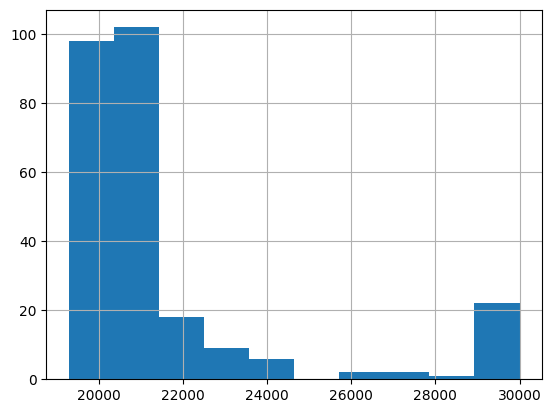

In [81]:
hyperdf_backwards[hyperdf_backwards['Mean Test MAE'] <= 1e+11]['Mean Test MAE'].hist()

In [82]:
hyperdf[hyperdf['Mean Test MAE'] <= 5e+12].sort_values('Mean Test MAE').round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,20458.0,646.0,21578.0,958.0,32829.0,1767.0,35339.0,7288.0,all continuous and ordinal,5,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,23487.0,435.0,23858.0,1124.0,36525.0,1444.0,37435.0,6058.0,top 10 features by correlation,5,"[23926.510051139394, 23492.653993932792, 23409...","[22236.15590435126, 24521.373549107302, 23798....","[38247.294098794904, 36441.23648663021, 36236....","[29791.460367925145, 37875.09972239045, 39301....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,24043.0,681.0,25003.0,1952.0,39440.0,2212.0,41225.0,8078.0,all numerical/continuous,5,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24835.0,401.0,25301.0,1144.0,36742.0,1206.0,37205.0,4809.0,all ordinal,5,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28758.0,375.0,28913.0,1365.0,42409.0,1010.0,42587.0,4178.0,2 highest correlated features,5,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,33723.0,622.0,33766.0,2017.0,48565.0,1108.0,48493.0,4390.0,baseline using single most correlated feature,5,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,40997.0,741.0,41460.0,1846.0,58856.0,1294.0,59417.0,5208.0,Numerical features with smart approach,5,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,50918.0,719.0,51026.0,2418.0,68772.0,1144.0,68911.0,4685.0,Numerical features with naive approach,5,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()


In [83]:
hyperdf[hyperdf['Mean Test RMSE'] <= 5e+12].sort_values('Mean Test RMSE').round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,20458.0,646.0,21578.0,958.0,32829.0,1767.0,35339.0,7288.0,all continuous and ordinal,5,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",24,24835.0,401.0,25301.0,1144.0,36742.0,1206.0,37205.0,4809.0,all ordinal,5,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",10,23487.0,435.0,23858.0,1124.0,36525.0,1444.0,37435.0,6058.0,top 10 features by correlation,5,"[23926.510051139394, 23492.653993932792, 23409...","[22236.15590435126, 24521.373549107302, 23798....","[38247.294098794904, 36441.23648663021, 36236....","[29791.460367925145, 37875.09972239045, 39301....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",27,24043.0,681.0,25003.0,1952.0,39440.0,2212.0,41225.0,8078.0,all numerical/continuous,5,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",2,28758.0,375.0,28913.0,1365.0,42409.0,1010.0,42587.0,4178.0,2 highest correlated features,5,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",1,33723.0,622.0,33766.0,2017.0,48565.0,1108.0,48493.0,4390.0,baseline using single most correlated feature,5,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",6,40997.0,741.0,41460.0,1846.0,58856.0,1294.0,59417.0,5208.0,Numerical features with smart approach,5,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",2,50918.0,719.0,51026.0,2418.0,68772.0,1144.0,68911.0,4685.0,Numerical features with naive approach,5,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()


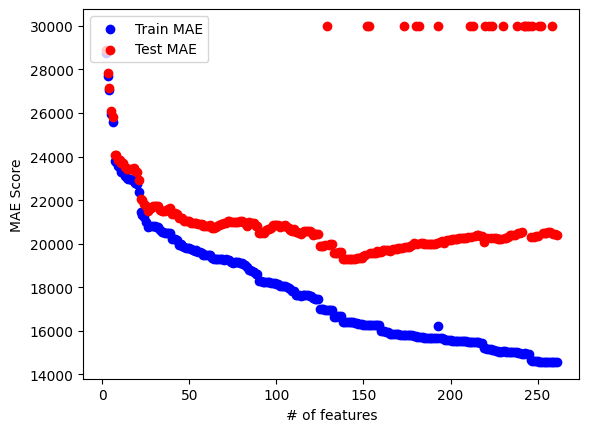

In [84]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

metric = "MAE"

# Plot the data
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Train " + metric], color="blue",
            label="Train " + metric)
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Test " + metric], color="red",
            label="Test " + metric)

plt.legend(loc=2)

# Add labels to the axes
plt.xlabel("# of features")
plt.ylabel(metric + " Score")

# Show the plot
plt.show()

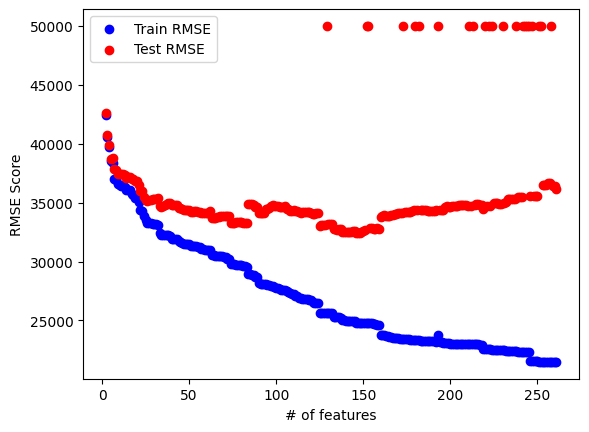

In [85]:
metric = "RMSE"

# Plot the data
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Train " + metric], color="blue",
            label="Train " + metric)
plt.scatter(hyperdf_backwards["# of features"],
            hyperdf_backwards["Mean Test " + metric], color="red",
            label="Test " + metric)

plt.legend(loc=2)

# Add labels to the axes
plt.xlabel("# of features")
plt.ylabel(metric + " Score")

# Show the plot
plt.show()

# Lasso model

## All numerical/continuous features

In [310]:
feats = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

X = df[feats].copy()
X.head()

,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


- Choose subset using all non-zero coefficients from Lasso

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [312]:
model = Lasso()

model.fit(X_train, y_train)

Lasso()

- Sort coefficients
- Note that Lasso automatically scales the coefficients based on the feature

In [313]:
# create dataframe for raw and transformed coefficients

coefs = pd.DataFrame(model.coef_, index=X.columns)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.sort_values(by='abs Coefs', ascending=False)


,Raw Coefficients,abs Coefs
YearRemodAdd,616.852842,616.852842
YrSold,-508.630362,508.630362
YearBuilt,491.653419,491.653419
ScreenPorch,100.697720,100.697720
PoolArea,-67.570506,67.570506
GarageArea,55.591039,55.591039
1stFlrSF,55.024440,55.024440
2ndFlrSF,54.295142,54.295142
3SsnPorch,49.367237,49.367237
EnclosedPorch,40.574596,40.574596


- Ok so there's none non zero here so keep all

In [314]:
out = regress(X, y, Notes='all numerical/continuous Lasso', model=Lasso())
out

{'Features': Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 27,
 'Mean Train MAE': 23951.79837766285,
 'Std Train MAE': 609.3541298341972,
 'Mean Test MAE': 24766.64768633098,
 'Std Test MAE': 2052.1922749794926,
 'Mean Train RMSE': 39496.04828202626,
 'Std Train RMSE': 2230.3292635609155,
 'Mean Test RMSE': 40966.45811260651,
 'Std Test RMSE': 8110.35806193388,
 'Notes': 'all numerical/continuous Lasso',
 'Folds': 5,
 'Train MAE': array([24165.5662612 , 24169.34221517, 24017.315273  , 24607.77017282,
        22798.99796612]),
 'Test MAE': array([24467.17517931, 24474

In [315]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- So in this case we get the same result as the OLS model

## Treat ordinals as categorical

In [316]:
X = pd.get_dummies(df[ordinals], dummy_na=True)
X.head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_nan,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterCond_nan,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HeatingQC_nan,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,KitchenQual_nan,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Functional_nan,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PavedDrive_nan,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_nan,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_nan,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_nan,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_nan,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_nan,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_nan
0,7,5,1,0,2,1,8,0,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,6,8,0,1,2,0,6,1,2,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,7,5,1,0,2,1,6,1,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
3,7,5,1,0,1,0,7,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,8,5,1,0,2,1,9,1,3,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
model = Lasso()

model.fit(X_train, y_train)

Lasso()

In [319]:
# create dataframe for raw and transformed coefficients

coefs = pd.DataFrame(model.coef_, index=X.columns)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.sort_values(by='abs Coefs', ascending=False)


,Raw Coefficients,abs Coefs
GarageQual_Ex,89023.534031,89023.534031
GarageCond_Ex,-81951.722871,81951.722871
BsmtQual_Ex,45286.181358,45286.181358
BsmtCond_Po,39852.929458,39852.929458
Functional_Sev,-38584.329563,38584.329563
HeatingQC_Po,-36714.454764,36714.454764
KitchenQual_Ex,31582.197124,31582.197124
BsmtExposure_Gd,22419.864543,22419.864543
Functional_Maj1,-18691.117962,18691.117962
GarageCars,18544.142034,18544.142034


- Lots of columns to drop here

In [320]:
# extract columns for which we have non zero coefs from Lasso

X = X[coefs[coefs['abs Coefs'] != 0].index].copy()

In [321]:
out = regress(X, y, Notes='Ordinals treated as categorical, one hot encode, Lasso',
              model=Lasso())
out

{'Features': Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
        'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa',
        'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'HeatingQC_Ex',
        'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'KitchenQual_Ex',
        'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj1',
        'Functional_Maj2', 'Functional_Min2', 'Functional_Mod',
        'Functional_Sev', 'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_Fa',
        'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA', 'FireplaceQu_nan',
        'PavedDrive_N', 'PavedDrive_Y', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
        'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
        'BsmtFinType1_Unf', 'BsmtFinType1_nan', 'BsmtQual_Ex', 'BsmtQual_Fa',
        'BsmtQual_Gd', 'BsmtQual_nan', 'BsmtCond_Fa', 'BsmtCond_Po',
        'BsmtCond_TA', 

In [322]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- Ok good results from this compared to the Linear model, significantly lower test RMSE

## Combine both ordinal setups

In [323]:
# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# ordinals treated as categoricals with one hot encoding
t2 = pd.get_dummies(df[ordinals], dummy_na=True)

In [324]:
# extract columns that are in 2nd but not in first

left_cols = list(set(t2.columns).difference(set(t1.columns)))

In [325]:
X = pd.concat([t1, t2[left_cols]], axis=1)

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
model = Lasso()

model.fit(X_train, y_train)

Lasso()

In [328]:
# create dataframe for raw and transformed coefficients

coefs = pd.DataFrame(model.coef_, index=X.columns)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.sort_values(by='abs Coefs', ascending=False)


,Raw Coefficients,abs Coefs
ExterQual_Ex,-83355.894486,83355.894486
GarageQual_Ex,81792.103903,81792.103903
ExterQual_Fa,77004.148805,77004.148805
GarageCond_Ex,-71986.404813,71986.404813
ExterQual,59253.585533,59253.585533
KitchenQual_Fa,43736.852770,43736.852770
BsmtQual_Ex,35061.020951,35061.020951
ExterQual_Gd,-33389.260023,33389.260023
BsmtCond_Po,31512.844922,31512.844922
Functional_Sev,-23529.882457,23529.882457


- Again some to drop

In [329]:
# extract columns for which we have non zero coefs from Lasso

X = X[coefs[coefs['abs Coefs'] != 0].index].copy()

In [330]:
out = regress(X, y, Notes='Both ordinals setups, Lasso',
              model=Lasso())
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'HeatingQC', 'BsmtFullBath',
        'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'PavedDrive',
        'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2', 'BsmtExposure',
        'GarageQual', 'GarageFinish', 'GarageCond', 'GarageQual_TA',
        'ExterCond_TA', 'ExterCond_Gd', 'KitchenQual_Ex', 'FireplaceQu_Ex',
        'KitchenQual_TA', 'ExterQual_Gd', 'BsmtExposure_No', 'BsmtFinType1_Unf',
        'BsmtFinType2_ALQ', 'GarageCond_Ex', 'BsmtExposure_Av',
        'FireplaceQu_Gd', 'GarageFinish_Fin', 'Functional_Sev', 'BsmtCond_Fa',
        'FireplaceQu_Po', 'Functional_Maj2', 'BsmtQual_Fa', 'BsmtExposure_Gd',
        'GarageCond_Po', 'Functional_Min2', 'Functional_Mod',
        'BsmtFinType1_GLQ', 'PavedDrive_P', 'GarageQual_Ex', 'BsmtQual_Gd',
        'FireplaceQu_TA', 'BsmtCond_Po', 'HeatingQC_Po', 'GarageFinish_RFn',
       

In [331]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- Not much difference here

## All continuous and ordinal
  - We'll take the ordinal as actual ordinal here as well

In [332]:
# Now create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# nums_and_ords = all_nums + all_ords

In [333]:
X = pd.concat([t1, df[all_nums]], axis=1)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [335]:
model = Lasso()

model.fit(X_train, y_train)

Lasso()

In [336]:
# create dataframe for raw and transformed coefficients

coefs = pd.DataFrame(model.coef_, index=X.columns)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.sort_values(by='abs Coefs', ascending=False)


,Raw Coefficients,abs Coefs
GarageCars,12669.486838,12669.486838
ExterQual,12576.032872,12576.032872
OverallQual,12056.456185,12056.456185
KitchenQual,10745.814762,10745.814762
BsmtQual,10049.048719,10049.048719
GarageQual,9443.615813,9443.615813
BsmtCond,-8814.374354,8814.374354
BsmtFullBath,5591.565186,5591.565186
OverallCond,5071.605939,5071.605939
Functional,4854.166605,4854.166605


In [337]:
out = regress(X, y, Notes='all continuous and ordinal, Lasso',
              model=Lasso())
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageCars',
        'PavedDrive', 'BsmtFinType1', 'BsmtQual', 'BsmtCond', 'BsmtFinType2',
        'BsmtExposure', 'GarageQual', 'GarageFinish', 'GarageCond', 'LotArea',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
        'GarageYrBlt_isna', 'MasVnrArea_isna', 'LotFrontage_isna',
        'GarageYrBlt', 'MasVnrArea', 'LotFrontage'],
       dtype='object'),
 '# of features': 51,
 'Mean Train MAE': 20420.223311261783,
 'Std Train MAE': 605.7493539275107,
 'Mean Test MAE': 21500.09947802792,
 'Std Test MAE

In [338]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

## All Categorical

In [339]:
# categoricals

cats = ['MSSubClass', 'MSZoning', 'BldgType', 'HouseStyle', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'SaleType', 'SaleCondition',
        'MiscFeature', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Foundation', 'Heating', 'CentralAir',
        "Neighborhood", 'Condition1', 'Condition2']

# 'MiscFeature' # weird one

# potential location ones
# "Neighborhood", 'Condition1', 'Condition2'

# categoricals with na
cats_w_na = ['GarageType', 'Electrical', 'MasVnrType', 'FireplaceQu', 'Fence',
             'Alley', 'PoolQC']

all_cats = cats + cats_w_na

In [340]:
X = pd.get_dummies(df[all_cats], dummy_na=True)
X.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_nan,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_nan,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_nan,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_nan,Alley_Grvl,Alley_Pave,Alley_nan,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_nan
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [342]:
model = Lasso()

model.fit(X_train, y_train)

Lasso()

In [343]:
# create dataframe for raw and transformed coefficients

coefs = pd.DataFrame(model.coef_, index=X.columns)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.sort_values(by='abs Coefs', ascending=False)


,Raw Coefficients,abs Coefs
PoolQC_Ex,2.324427e+05,2.324427e+05
Condition2_PosA,1.856656e+05,1.856656e+05
RoofMatl_WdShngl,1.414513e+05,1.414513e+05
RoofMatl_ClyTile,-1.394082e+05,1.394082e+05
Neighborhood_StoneBr,9.338186e+04,9.338186e+04
Neighborhood_NridgHt,8.070071e+04,8.070071e+04
HouseStyle_2.5Fin,7.732153e+04,7.732153e+04
Neighborhood_NoRidge,7.724194e+04,7.724194e+04
Exterior2nd_ImStucc,7.376004e+04,7.376004e+04
Utilities_AllPub,7.026499e+04,7.026499e+04


In [344]:
# extract columns for which we have non zero coefs from Lasso

X = X[coefs[coefs['abs Coefs'] != 0].index].copy()

In [345]:
out = regress(X, y, Notes='all categorical features, Lasso',
              model=Lasso())
out

{'Features': Index(['MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSSubClass_20',
        'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
        'MSSubClass_60', 'MSSubClass_70',
        ...
        'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnWw', 'Fence_nan', 'Alley_Pave',
        'Alley_nan', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_nan'],
       dtype='object', length=193),
 '# of features': 193,
 'Mean Train MAE': 24525.506627108763,
 'Std Train MAE': 494.8666021888827,
 'Mean Test MAE': 30175.764597823203,
 'Std Test MAE': 1903.3513257224813,
 'Mean Train RMSE': 35898.90148974163,
 'Std Train RMSE': 851.1753764678589,
 'Mean Test RMSE': 45355.89178799041,
 'Std Test RMSE': 4011.0944708268876,
 'Notes': 'all categorical features, Lasso',
 'Folds': 5,
 'Train MAE': array([24768.48030048, 24282.60746753, 23940.93672908, 25362.68053871,
        24272.82809974]),
 'Test MAE': array([28309.29592486, 31904.18375769, 31355.9556699 , 27451.66036815,
        31

In [346]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

- Again dropping the non zero coefficients helped significantly

## All features

In [347]:
# Create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# nums_and_ords = all_nums + all_ords

In [348]:
X = pd.concat([t1, df[all_nums]], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


In [349]:
# now combine the numerical and ordinal with categorical

cats_df = pd.get_dummies(df[all_cats], dummy_na=True)

X = pd.concat([X, cats_df], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Electrical_FuseA

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [351]:
model = Lasso()

model.fit(X_train, y_train)

Lasso()

In [352]:
# create dataframe for raw and transformed coefficients

coefs = pd.DataFrame(model.coef_, index=X.columns)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.sort_values(by='abs Coefs', ascending=False)


,Raw Coefficients,abs Coefs
PoolQC_Gd,-6.174957e+05,6.174957e+05
PoolQC_Fa,-5.078892e+05,5.078892e+05
PoolQC_nan,3.317110e+05,3.317110e+05
RoofMatl_ClyTile,-2.872427e+05,2.872427e+05
PoolQC_Ex,-2.755712e+05,2.755712e+05
Condition2_PosN,-2.092973e+05,2.092973e+05
MiscFeature_TenC,9.260380e+04,9.260380e+04
Condition2_PosA,5.719270e+04,5.719270e+04
Condition2_RRAe,-5.595768e+04,5.595768e+04
FireplaceQu_Ex,-5.543999e+04,5.543999e+04


In [353]:
# extract columns for which we have non zero coefs from Lasso

X = X[coefs[coefs['abs Coefs'] != 0].index].copy()

In [354]:
out = regress(X, y, Notes='all features, Lasso',
              model=Lasso())
out

{'Features': Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'HeatingQC',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual',
        ...
        'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Alley_Pave',
        'Alley_nan', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'PoolQC_nan'],
       dtype='object', length=237),
 '# of features': 237,
 'Mean Train MAE': 14642.411798258352,
 'Std Train MAE': 296.4303369864218,
 'Mean Test MAE': 20076.018266647912,
 'Std Test MAE': 1135.7212368692904,
 'Mean Train RMSE': 21545.85492823009,
 'Std Train RMSE': 637.1660187621827,
 'Mean Test RMSE': 35438.8014801563,
 'Std Test RMSE': 7345.983864152007,
 'Notes': 'all features, Lasso',
 'Folds': 5,
 'Train MAE': array([14596.67287454, 14848.76000736, 14212.61966408, 15071.73370059,
        14482.27274473]),
 'Test MAE': array([19670.80533365, 20006.66047102, 20409.87443305, 18391.532908  ,
        21901.21818752]),
 'Train RMSE': array([22184.51321557,

In [355]:
hyperdf = hyperdf.append(out, ignore_index=True)
hyperdf.round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
0,"Index(['MasVnrArea', 'LotFrontage'], dtype='ob...",0,50900.0,700.0,5.100000e+04,2.400000e+03,68700.0,1100.0,6.890000e+04,4.600000e+03,Numerical features with naive approach,0,"[51374.920052864305, 49833.777504480895, 50630...","[49139.05525895495, 54376.191779954854, 52518....","[69990.74915738498, 67730.88469327173, 68081.9...","[64014.98287924205, 73129.51171339606, 71959.4...",LinearRegression()
1,"Index(['GarageYrBlt_isna', 'MasVnrArea_isna', ...",0,40900.0,700.0,4.140000e+04,1.800000e+03,58800.0,1200.0,5.940000e+04,5.200000e+03,Numerical features with smart approach,0,"[41422.64043995177, 40287.3146661194, 40494.79...","[40183.65547804687, 42768.655915726864, 42732....","[60107.86726986333, 58639.82850941593, 57685.6...","[54210.8930157506, 60584.7240989845, 64172.229...",LinearRegression()
2,"Index(['OverallQual'], dtype='object')",0,33700.0,600.0,3.370000e+04,2.000000e+03,48500.0,1100.0,4.840000e+04,4.300000e+03,baseline using single most correlated feature,0,"[34117.10336130585, 33290.297298534904, 32920....","[32087.026266832185, 35617.89568102952, 36148....","[49840.22992041868, 48617.94154897005, 46851.4...","[43226.91783631449, 48486.47097996885, 55105.9...",LinearRegression()
3,"Index(['OverallQual', 'GrLivArea'], dtype='obj...",0,28700.0,300.0,2.890000e+04,1.300000e+03,42400.0,1000.0,4.250000e+04,4.100000e+03,2 highest correlated features,0,"[29184.44455190781, 28610.965496216086, 28384....","[27112.360859175325, 29629.550895243145, 29304...","[43716.161155878486, 42333.18113753699, 41752....","[37003.44813403181, 42963.793999464055, 45636....",LinearRegression()
4,"Index(['LotArea', 'YearBuilt', 'YearRemodAdd',...",0,24000.0,600.0,2.500000e+04,1.900000e+03,39400.0,2200.0,4.120000e+04,8.000000e+03,all numerical/continuous,0,"[24304.993374461203, 24301.630413812294, 24059...","[24943.183426942433, 24447.70999458347, 23177....","[41178.04632506182, 39723.344982177194, 40211....","[34526.219038501855, 40822.48135062879, 38750....",LinearRegression()
5,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,24800.0,400.0,2.530000e+04,1.100000e+03,36700.0,1200.0,3.720000e+04,4.800000e+03,all ordinal,0,"[25208.369915157284, 24815.445125149825, 24186...","[23835.94225319929, 25532.52953048413, 26777.4...","[38156.14653249388, 37105.09884631882, 35541.4...","[31331.414093767857, 36013.39873996856, 42198....",LinearRegression()
6,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22300.0,300.0,9.594627e+12,1.410297e+13,33800.0,1200.0,1.095776e+14,1.359605e+14,"Ordinals treated as categorical, one hot encode",0,"[22758.411922089042, 22342.914383561645, 22068...","[1055977366767.6978, 37524641172026.45, 385085...","[35368.802968754404, 33833.56550831049, 33022....","[14627242355683.562, 372761509608161.8, 658033...",LinearRegression()
7,"Index(['OverallQual', 'OverallCond', 'ExterQua...",100,22300.0,300.0,1.381532e+13,1.168192e+13,33800.0,1200.0,1.909630e+14,1.587321e+14,Both ordinals setups,0,"[22761.44113869863, 22338.424657534248, 22068....","[14404242422227.842, 29009064229342.1, 1466320...","[35368.83267465456, 33833.16444893124, 33022.8...","[216612953106675.03, 299667487151169.8, 250564...",LinearRegression()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
9,"Index(['OverallQual', 'GrLivArea', 'ExterQual'...",0,23400.0,400.0,2.380000e+04,1.100000e+03,36500.0,1400.0,3.740000e+04,6.000000e+03,top 10 features by correlation,0,"[23926.510051139394, 23492.653993932792, 23409...","

# Final Model Selection

- Seems like anywhere from 75 to 150 features will be good based on the above

In [356]:
hyperdf.sort_values(by='Mean Test RMSE').round()

,Features,# of features,Mean Train MAE,Std Train MAE,Mean Test MAE,Std Test MAE,Mean Train RMSE,Std Train RMSE,Mean Test RMSE,Std Test RMSE,Notes,Folds,Train MAE,Test MAE,Train RMSE,Test RMSE,Model Type
31,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,20420.0,606.0,2.150000e+04,1.014000e+03,32890.0,1787.0,3.522300e+04,7.317000e+03,"all continuous and ordinal, Lasso",5,"[20765.300109485714, 20568.462362457034, 20410...","[20825.92758267845, 21562.926501285056, 21979....","[34704.85156091682, 33014.292257174595, 32881....","[27299.32038411695, 34965.988489365045, 36023....",Lasso()
25,"Index(['OverallQual', 'OverallCond', 'ExterQua...",51,20421.0,606.0,2.150200e+04,1.014000e+03,32890.0,1787.0,3.522400e+04,7.317000e+03,all continuous and ordinal,5,"[20766.661536489806, 20569.455454048664, 20411...","[20827.42992389433, 21563.06065805677, 21983.1...","[34704.84943927799, 33014.289107838, 32881.303...","[27300.018202207124, 34965.43344759289, 36025....",LinearRegression()
14,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.300000e+03,"all continuous and ordinal, Lasso",0,"[20859.206881096437, 20624.55253282383, 20405....","[20973.415667174933, 21684.847763926035, 21951...","[34625.8799193697, 32959.14563562619, 32855.10...","[27584.2429337742, 35033.27125056637, 36035.85...",Lasso()
8,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,20400.0,600.0,2.150000e+04,9.000000e+02,32800.0,1700.0,3.530000e+04,7.200000e+03,all continuous and ordinal,0,"[20868.521786576137, 20630.99268969516, 20394....","[21017.799085718852, 21716.91604140758, 21954....","[34608.3403496537, 32940.37976496939, 32841.81...","[27621.46642685809, 35039.15781654459, 36001.9...",LinearRegression()
13,"Index(['OverallQual', 'OverallCond', 'ExterQua...",0,22400.0,300.0,2.360000e+04,1.000000e+03,33800.0,1200.0,3.540000e+04,5.000000e+03,"Both ordinals setups, Lasso",0,"[22760.798353745984, 22347.998271757482, 22076...","[22457.06870727928, 24186.097074006302, 24837....","[35369.05754035882, 33834.114206167535, 33023....","[28875.67388780995, 35970.69499667421, 39112.4...",Lasso()
12,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",0,22400.0,300.0,2.360000e+04,1.000000e+03,33800.0,1200.0,3.540000e+04,5.000000e+03,"Ordinals treated as categorical, one hot encod...",0,"[22761.01611240391, 22351.69108472001, 22084.0...","[22460.140030461636, 24214.14302271461, 24806....","[35369.03438412961, 33834.60725652735, 33024.0...","[28900.850926055875, 35994.11640310578, 39097....",Lasso()
30,"Index(['OverallQual', 'OverallCond', 'ExterQua...",89,22400.0,340.0,2.368000e+04,1.076000e+03,33817.0,1277.0,3.542800e+04,5.072000e+03,"Both ordinals setups, Lasso",5,"[22760.798353745984, 22347.998271757482, 22076...","[22457.06870727928, 24186.097074006302, 24837....","[35369.05754035882, 33834.114206167535, 33023....","[28875.67388780995, 35970.69499667421, 39112.4...",Lasso()
29,"Index(['OverallQual', 'OverallCond', 'BsmtFull...",78,22403.0,340.0,2.367400e+04,1.079000e+03,33817.0,1277.0,3.543100e+04,5.065000e+03,"Ordinals treated as categorical, one hot encod...",5,"[22761.01611240391, 22351.69108472001, 22084.0...","[22460.140030461636, 24214.14302271461, 24806....","[35369.03438412961, 33834.60725652735, 33024.0...","[28900.850926055875, 35994.11640310578, 39097....",Lasso()
33,"Index(['OverallQual', 'OverallCond', 'ExterQua...",237,14642.0,296.0,2.007600e+04,1.136000e+03,21546.0,637.0,3.543900e+04,7.346000e+03,"all features, Lasso",5,"[14596.672874535096, 14848.760007358092, 14212...","[19670.805333646585, 20006.660471024163, 20409...","[22184.513215566712, 21196.99765174482, 20501....","[29405.988231011666, 34935.26059828722, 37686....",Lasso()
16,"Index(['OverallQual', 'OverallCond', 'ExterQua...",200,14600.0,200.0,2.000000e+04,1.100000e+03,21500.0,600.0,3.550000e+04,7.500000e+03,"all features, Lasso",0,"[14599.34151413707, 14846.168640450594, 14188....","[19655.554444279896, 19988.017335444754

In [363]:
def rounder(number):
  rounded_number = (number // 10) * 10
  return(rounded_number)

In [364]:
hyperdf.columns

Index(['Features', '# of features', 'Mean Train MAE', 'Std Train MAE',
       'Mean Test MAE', 'Std Test MAE', 'Mean Train RMSE', 'Std Train RMSE',
       'Mean Test RMSE', 'Std Test RMSE', 'Notes', 'Folds', 'Train MAE',
       'Test MAE', 'Train RMSE', 'Test RMSE', 'Model Type'],
      dtype='object')

In [367]:
# Apply the rounder function to only numeric columns
numeric_cols = hyperdf.drop(columns='# of features').select_dtypes(include=['number']).columns
hyperdf[numeric_cols] = hyperdf[numeric_cols].applymap(rounder)

hyperdf[['# of features', 'Mean Train MAE', 'Std Train MAE',
       'Mean Test MAE', 'Std Test MAE', 'Mean Train RMSE', 'Std Train RMSE',
       'Mean Test RMSE', 'Std Test RMSE', 'Notes']].sort_values('Mean Test RMSE', ascending=True).head(15).to_csv("temp.csv")
hyperdf[['# of features', 'Mean Train MAE', 'Std Train MAE',
       'Mean Test MAE', 'Std Test MAE', 'Mean Train RMSE', 'Std Train RMSE',
       'Mean Test RMSE', 'Std Test RMSE', 'Notes']].sort_values('Mean Test RMSE', ascending=True).head(15)


- Fit Lasso Model, do Backward stepwise regression
- I.e. fitting a model with all features, iteratively dropping the least significant feature until the model performance starts to drop

In [179]:
# Create new list with all numerical features

all_nums = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt_isna', 'MasVnrArea_isna',
'LotFrontage_isna', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage']

# ordinals used as actual ordinals
t1 = df2[ordinals].copy()

# nums_and_ords = all_nums + all_ords

In [180]:
X = pd.concat([t1, df[all_nums]], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage
0,7,5,4,3,5,1,0,2,1,4,8,8,0,0,2,2,7,4,3,2,2,3,3,3,8450,2003,2003,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,2008,0,0,0,2003.0,196.0,65.0
1,6,8,3,3,5,0,1,2,0,3,6,8,1,3,2,2,6,4,3,2,5,3,3,3,9600,1976,1976,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,2007,0,0,0,1976.0,0.0,80.0
2,7,5,4,3,5,1,0,2,1,4,6,8,1,3,2,2,7,4,3,2,3,3,3,3,11250,2001,2002,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,2008,0,0,0,2001.0,162.0,68.0
3,7,5,3,3,4,1,0,1,0,4,7,8,1,4,3,2,6,3,4,2,2,3,2,3,9550,1915,1970,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,2006,0,0,0,1998.0,0.0,60.0
4,8,5,4,3,5,1,0,2,1,4,9,8,1,3,3,2,7,4,3,2,4,3,3,3,14260,2000,2000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,2008,0,0,0,2000.0,350.0,84.0


In [181]:
# now combine the numerical and ordinal with categorical

cats_df = pd.get_dummies(df[all_cats], dummy_na=True)

X = pd.concat([X, cats_df], axis=1)
X.head()

,OverallQual,OverallCond,ExterQual,ExterCond,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,PavedDrive,BsmtFinType1,BsmtQual,BsmtCond,BsmtFinType2,BsmtExposure,GarageQual,GarageFinish,GarageCond,LotArea,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,GarageYrBlt_isna,MasVnrArea_isna,LotFrontage_isna,GarageYrBlt,MasVnrArea,LotFrontage,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_nan,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BldgType_nan,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_nan,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofStyle_nan,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofMatl_nan,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_nan,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_nan,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotShape_nan,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandContour_nan,Utilities_AllPub,Utilities_NoSeWa,Utilities_nan,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotConfig_nan,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LandSlope_nan,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Foundation_nan,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating_nan,CentralAir_N,CentralAir_Y,CentralAir_nan,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Neighborhood_nan,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition1_nan,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Condition2_nan,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_nan,Electrical_FuseA

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
# skeleton hyperparameter df for lasso backwards selection of features

hyperdf_lasso = pd.DataFrame()

In [223]:
new_cols = X_train.columns

In [224]:
%%time

for i in range(len(X_train.columns)):

  model = Lasso()

  model.fit(X_train[new_cols], y_train)
  root_test = np.sqrt(mean_squared_error(y_test, model.predict(X_test[new_cols])))

  root_train = np.sqrt(mean_squared_error(y_train, model.predict(X_train[new_cols])))

  out = {"Features":new_cols,
              "# of features": len(new_cols),
              "Train RMSE":root_train,
              "Test RMSE":root_test}

  coefs = pd.DataFrame(model.coef_, index=new_cols)
  coefs.columns = ['Raw Coefficients']
  coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()

  hyperdf_lasso = hyperdf_lasso.append(out, ignore_index=True)
  new_cols = coefs.sort_values(by='abs Coefs', ascending=False).iloc[:-1].index
  new_cols

CPU times: user 45.3 s, sys: 27.5 s, total: 1min 12s
Wall time: 52.7 s


In [228]:
hyperdf_lasso.sort_values("Test RMSE").head()

,Features,# of features,Train RMSE,Test RMSE
0,"Index(['OverallQual', 'OverallCond', 'ExterQua...",283,21151.369883,32245.417173
2,"Index(['PoolQC_nan', 'PoolQC_Gd', 'PoolQC_Fa',...",281,21146.361386,32474.535647
82,"Index(['PoolQC_nan', 'PoolQC_Ex', 'Condition2_...",201,22242.857169,32634.450763
73,"Index(['PoolQC_nan', 'RoofMatl_ClyTile', 'Cond...",210,21572.487405,32634.660750
83,"Index(['PoolQC_nan', 'PoolQC_Ex', 'Condition2_...",200,22242.683922,32640.036165


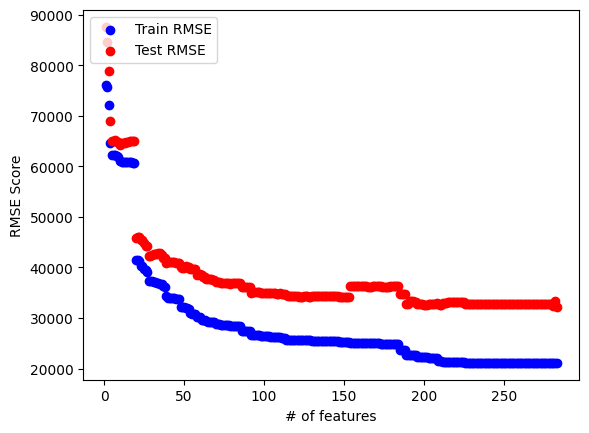

In [229]:
metric = "RMSE"

# Plot the data
plt.scatter(hyperdf_lasso["# of features"],
            hyperdf_lasso["Train RMSE"], color="blue",
            label="Train " + metric)
plt.scatter(hyperdf_lasso["# of features"],
            hyperdf_lasso["Test RMSE"], color="red",
            label="Test " + metric)

plt.legend(loc=2)

# Add labels to the axes
plt.xlabel("# of features")
plt.ylabel(metric + " Score")

# Show the plot
plt.show()

# Fitting of final model

In [231]:
model = Lasso()

model.fit(X, y)

coefs = pd.DataFrame(model.coef_, index=X.columns)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.head()

,Raw Coefficients,abs Coefs
OverallQual,8374.376355,8374.376355
OverallCond,5550.648100,5550.648100
ExterQual,4931.085567,4931.085567
ExterCond,-3550.826615,3550.826615
HeatingQC,1219.296347,1219.296347


In [235]:
# Excluding those with zero coefficients

new_cols = coefs[coefs['abs Coefs'] != 0].index

In [239]:
model = Lasso()

model.fit(X[new_cols], y)

coefs = pd.DataFrame(model.coef_, index=new_cols)
coefs.columns = ['Raw Coefficients']
coefs['abs Coefs'] = coefs['Raw Coefficients'].abs()
coefs.sort_values('abs Coefs', ascending=False).head(10)

,Raw Coefficients,abs Coefs
RoofMatl_ClyTile,-554483.386444,554483.386444
Condition2_PosN,-219578.855734,219578.855734
PoolQC_Fa,-150171.781291,150171.781291
PoolQC_nan,150040.655559,150040.655559
PoolQC_Gd,-126722.780078,126722.780078
Condition2_RRAe,-106001.487817,106001.487817
RoofStyle_Shed,80064.638719,80064.638719
RoofMatl_WdShngl,79991.244843,79991.244843
RoofMatl_Membran,66294.146102,66294.146102
Utilities_AllPub,60719.221287,60719.221287


In [ ]:
def rounder(number):
  rounded_number = (number // 10) * 10
  return(rounded_number)

In [250]:
coefs.sort_values('Raw Coefficients', ascending=False).head(10).apply(rounder).to_csv("temp.csv")
coefs.sort_values('Raw Coefficients', ascending=False).head(10).apply(rounder)

,Raw Coefficients,abs Coefs
PoolQC_nan,150000.0,150000.0
RoofStyle_Shed,80000.0,80000.0
RoofMatl_WdShngl,79900.0,79900.0
RoofMatl_Membran,66200.0,66200.0
Utilities_AllPub,60700.0,60700.0
Condition2_PosA,57100.0,57100.0
Neighborhood_StoneBr,44700.0,44700.0
RoofMatl_Metal,39900.0,39900.0
Neighborhood_NridgHt,33800.0,33800.0
MiscFeature_Othr,26900.0,26900.0


In [242]:
coefs.sort_values('Raw Coefficients', ascending=True).head(10)

,Raw Coefficients,abs Coefs
RoofMatl_ClyTile,-554483.386444,554483.386444
Condition2_PosN,-219578.855734,219578.855734
PoolQC_Fa,-150171.781291,150171.781291
PoolQC_Gd,-126722.780078,126722.780078
Condition2_RRAe,-106001.487817,106001.487817
FireplaceQu_Ex,-47481.353262,47481.353262
FireplaceQu_Gd,-42356.253570,42356.253570
Foundation_Wood,-33378.080276,33378.080276
Heating_OthW,-33137.603701,33137.603701
Exterior2nd_Other,-30860.094738,30860.094738


In [238]:
# Standard deviation of prediction

np.sqrt(mean_squared_error(y, model.predict(X[new_cols])))


22408.579013172002

# Conclusion

- Lots of things to take away from this:
  - we chose all features less those with 0 coefficient because the Test and Train RMSE kept going down and we have no reason to select a subset of features (other than the subset we've already defined)
  - We were able to predict home prices *within this data set* accurately with a standard deviation of \$33k on the train and \$35k on the test set.
  - Also if we had more features we could look at doing some additional feature engineering to get more valuable features via target encoding.
  - We could also look at using more sophisticated models.